In [1]:
import QUANTAXIS as QA
import sys


In [2]:
Account=QA.QA_Account(allow_sellopen=True,allow_t0=True,account_cookie='future_test',market_type=QA.MARKET_TYPE.FUTURE_CN,frequence=QA.FREQUENCE.FIFTEEN_MIN)

In [3]:
Broker=QA.QA_BacktestBroker()

In [4]:
rb_ds=QA.QA_fetch_future_min_adv('RBL8','2018-01-01','2018-08-28',frequence='15min')

In [5]:
import numpy as np
import pandas as pd
def MACD_JCSC(dataframe,SHORT=12,LONG=26,M=9):
    """
    1.DIF向上突破DEA，买入信号参考。
    2.DIF向下跌破DEA，卖出信号参考。
    """
    CLOSE=dataframe.close
    DIFF =QA.EMA(CLOSE,SHORT) - QA.EMA(CLOSE,LONG)
    DEA = QA.EMA(DIFF,M)
    MACD =2*(DIFF-DEA)

    CROSS_JC=QA.CROSS(DIFF,DEA)
    CROSS_SC=QA.CROSS(DEA,DIFF)
    ZERO=0
    return pd.DataFrame({'DIFF':DIFF,'DEA':DEA,'MACD':MACD,'CROSS_JC':CROSS_JC,'CROSS_SC':CROSS_SC,'ZERO':ZERO})

ind=rb_ds.add_func(MACD_JCSC)


In [ ]:
"""
_date = None
for items in rb_ds.panel_gen:
    if _date != items.date[0]:
        print('try to settle')
        _date=items.date[0]
        Account.settle()
    
    
    for item in items.security_gen:
        daily_ind=ind.loc[item.index]
        if daily_ind.CROSS_JC.iloc[0]>0:
            order=Account.send_order(
                code=item.code[0], 
                time=item.datetime[0], 
                amount=100, 
                towards=QA.ORDER_DIRECTION.SELL_OPEN, 
                price=0, 
                order_model=QA.ORDER_MODEL.CLOSE, 
                amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                )

            if order:
                print(order)
                print(item)
                Broker.receive_order(QA.QA_Event(order=order,market_data=item))


                trade_mes=Broker.query_orders(Account.account_cookie,'filled')
                res=trade_mes.loc[order.account_cookie,order.realorder_id]
                order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
        elif daily_ind.CROSS_SC.iloc[0]>0:
            if Account.sell_available.get(item.code[0], 0)<0:
                order=Account.send_order(
                    code=item.code[0], 
                    time=item.datetime[0], 
                    amount=abs(Account.sell_available.get(item.code[0], 0)), 
                    towards=QA.ORDER_DIRECTION.BUY_CLOSE, 
                    price=0, 
                    order_model=QA.ORDER_MODEL.MARKET, 
                    amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
                if order:
                    Broker.receive_order(QA.QA_Event(order=order,market_data=item))


                    trade_mes=Broker.query_orders(Account.account_cookie,'filled')
                    res=trade_mes.loc[order.account_cookie,order.realorder_id]
                    order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
    Account.settle()
            
"""

In [6]:
_date = None
for items in rb_ds.panel_gen:
    if _date != items.date[0]:
        print('try to settle')
        _date=items.date[0]
        Account.settle()
    
    
    for item in items.security_gen:
        daily_ind=ind.loc[item.index]
        if daily_ind.CROSS_JC.iloc[0]>0:
            order=Account.send_order(
                code=item.code[0], 
                time=item.datetime[0], 
                amount=200, 
                towards=QA.ORDER_DIRECTION.BUY_OPEN, 
                price=0, 
                order_model=QA.ORDER_MODEL.CLOSE, 
                amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                )

            if order:
                print(order)
                print(item)
                Broker.receive_order(QA.QA_Event(order=order,market_data=item))


                trade_mes=Broker.query_orders(Account.account_cookie,'filled')
                res=trade_mes.loc[order.account_cookie,order.realorder_id]
                order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
        elif daily_ind.CROSS_SC.iloc[0]>0:
            if Account.sell_available.get(item.code[0], 0)>0:
                order=Account.send_order(
                    code=item.code[0], 
                    time=item.datetime[0], 
                    amount=Account.sell_available.get(item.code[0], 0), 
                    towards=QA.ORDER_DIRECTION.SELL_CLOSE, 
                    price=0, 
                    order_model=QA.ORDER_MODEL.MARKET, 
                    amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
                if order:
                    Broker.receive_order(QA.QA_Event(order=order,market_data=item))


                    trade_mes=Broker.query_orders(Account.account_cookie,'filled')
                    res=trade_mes.loc[order.account_cookie,order.realorder_id]
                    order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
    Account.settle()
            

try to settle
try to settle
try to settle
< QA_Order realorder_id Order_7nNseWX0 datetime:2018-01-04 09:30:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_7nNseWX0 account:future_test status:queued >
< QA_DataStruct_Future_min with 1 securities >
receive deal
receive deal
< QA_Order realorder_id Order_HnMYk2C9 datetime:2018-01-04 14:45:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_HnMYk2C9 account:future_test status:queued >
< QA_DataStruct_Future_min with 1 securities >
receive deal
try to settle
receive deal
< QA_Order realorder_id Order_Pl4IKC8Y datetime:2018-01-05 15:00:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_Pl4IKC8Y account:future_test status:queued >
< QA_DataStruct_Future_min with 1 securities >
receive deal
try to settle
receive deal
< QA_Order realorder_id Order_uwxZ89gJ datetime:2018-01-08 15:00:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_uwxZ89gJ account:future_

receive deal
receive deal
try to settle
< QA_Order realorder_id Order_ai7nxHo9 datetime:2018-04-25 13:45:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_ai7nxHo9 account:future_test status:queued >
< QA_DataStruct_Future_min with 1 securities >
receive deal
receive deal
try to settle
< QA_Order realorder_id Order_u2HE3fla datetime:2018-04-26 21:30:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_u2HE3fla account:future_test status:queued >
< QA_DataStruct_Future_min with 1 securities >
receive deal
try to settle
receive deal
< QA_Order realorder_id Order_8iOwIRns datetime:2018-04-27 15:00:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_8iOwIRns account:future_test status:queued >
< QA_DataStruct_Future_min with 1 securities >
receive deal
try to settle
receive deal
try to settle
try to settle
< QA_Order realorder_id Order_P8LQTXOh datetime:2018-05-04 09:30:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn

< QA_Order realorder_id Order_fPOgW8cN datetime:2018-07-31 23:00:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_fPOgW8cN account:future_test status:queued >
< QA_DataStruct_Future_min with 1 securities >
receive deal
try to settle
receive deal
try to settle
< QA_Order realorder_id Order_WrR4AM75 datetime:2018-08-02 11:15:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_WrR4AM75 account:future_test status:queued >
< QA_DataStruct_Future_min with 1 securities >
receive deal
try to settle
receive deal
< QA_Order realorder_id Order_8NazdbZB datetime:2018-08-03 11:30:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_8NazdbZB account:future_test status:queued >
< QA_DataStruct_Future_min with 1 securities >
receive deal
receive deal
try to settle
< QA_Order realorder_id Order_M38p7ZGA datetime:2018-08-06 14:15:00 code:RBL8 amount:200 price:0 towards:2 btype:future_cn order_id:Order_M38p7ZGA account:future_test status:qu

In [12]:
Account.history_table

,datetime,code,price,amount,cash,order_id,realorder_id,trade_id,account_cookie,commission,tax,message
0,2018-01-04 09:30:00,RBL8,3823.0,200,235208.850,Order_7nNseWX0,Order_7nNseWX0,Trade_1sZ3iwJu,future_test,191.150,0,None
1,2018-01-04 11:15:00,RBL8,3803.5,-200,995718.675,Order_w1V72FOv,Order_w1V72FOv,Trade_3jHOlUsR,future_test,190.175,0,None
2,2018-01-04 14:45:00,RBL8,3817.0,200,232127.825,Order_HnMYk2C9,Order_HnMYk2C9,Trade_lvy4kpAs,future_test,190.850,0,None
3,2018-01-05 09:30:00,RBL8,3793.5,-200,990638.150,Order_9hZ8drqT,Order_9hZ8drqT,Trade_NkYx5c0d,future_test,189.675,0,None
4,2018-01-05 15:00:00,RBL8,3798.0,200,230848.250,Order_Pl4IKC8Y,Order_Pl4IKC8Y,Trade_XOjDdBWP,future_test,189.900,0,None
5,2018-01-08 09:30:00,RBL8,3775.0,-200,985659.500,Order_mLjXosyF,Order_mLjXosyF,Trade_kuA5Y7th,future_test,188.750,0,None
6,2018-01-08 15:00:00,RBL8,3818.0,200,221868.600,Order_uwxZ89gJ,Order_uwxZ89gJ,Trade_tsxhXinD,future_test,190.900,0,None
7,2018-01-09 10:45:00,RBL8,3821.0,-200,985877.550,Order_0EHxuAYa,Order_0EHxuAYa,Trade_q5YGdDlU,future_test,191.050,0,None
8,2018-01-10 10:15:00,RBL8,3849.0,200,215885.100,Order_Jjk1DEUN,Order_Jjk1DEUN,Trade_XrhqpGIa,future_test,192.450,0,None
9,2018-01-11 09:15:00,RBL8,3862.0,-200,988092.000,Order_31oVr6OG,Order_31oVr6OG,Trade_u3mWv7g1,future_test,193.100,0,None


In [13]:
rb_dayds=QA.QA_fetch_future_day_adv('RBL8','2018-01-01','2018-08-28')


In [14]:
Risk=QA.QA_Risk(Account,if_fq=False,market_data=rb_dayds)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

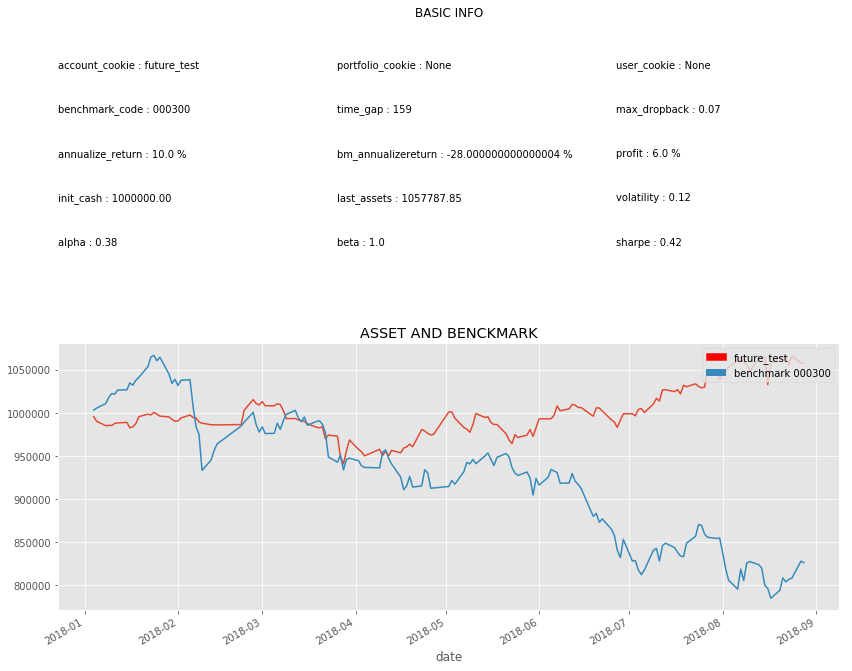

In [15]:
Risk.plot_assets_curve()

In [16]:
Risk.profit_construct

{'total_buyandsell': 109000.0,
 'total_tax': 0.0,
 'total_commission': -51212.15,
 'total_profit': 57787.85}